In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the innings data from CSV
innings = pd.read_csv('innings.csv')
matches = pd.read_csv('matches.csv')
over_bd = pd.read_csv('over_bd.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')
venues = pd.read_csv('venues.csv')
# Display the first few rows of the dataframe to ensure it's loaded correctly
print(innings.head())


   id  matchId  inningsNumber  runRate  overProgress  runs  wkts  ballsFaced  \
0   1     3124              1     4.82          50.0   241     9           0   
1   2     3124              2     3.95          47.2   187    10           0   
2   3     3125              1     6.68          50.0   334     6           0   
3   4     3125              2     3.26          40.1   131     9           0   
4   5     3126              1     3.98          50.0   199    10           0   

   fours  sixes  allOut  noBallRuns  wideRuns  byeRuns  legByeRuns  \
0      0      0   False           3         6        0           2   
1      0      0    True           0         2        0           2   
2      0      0   False           1         5        1           2   
3      0      0    True           1         6        0           9   
4      0      0    True           6         3        0           5   

   penaltyRuns  
0            0  
1            0  
2            0  
3            0  
4            

In [ ]:
over_hist = pd.read_csv('overHistory.csv')
over_hist.head()

<ipython-input-3-05055f3c0938>:1: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  over_hist = pd.read_csv('overHistory.csv')


,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
0,1,1,.,.,.,1Wd,.,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,.,.,.,1,1,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,W,1,.,1Nb,.,.,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1Nb,.,.,.,4,.,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,.,4,.,.,.,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
over_hist = over_hist[['id','inningId','bowlerId']]

In [ ]:
# Display the column names
print(innings.columns)
print(matches.columns)
print(over_bd.columns)
print(players.columns)
print(teams.columns)
print(venues.columns)
print(over_hist.columns)

Index(['id', 'matchId', 'inningsNumber', 'runRate', 'overProgress', 'runs',
       'wkts', 'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns',
       'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns', 'TotalRuns',
       'TotalWickets'],
      dtype='object')
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchType', 'tournamentLabel', 'oversLimit', 'isLimitedOvers', 'Year',
       'Month', 'Day', 'Time_start', 'DayName', 'Time_end'],
      dtype='object')
Index(['id', 'countingBall', 'nonCountingBall', 'bowlerId', 'facingBatsmanId',
       'boundary', 'overHistoryId', 'run_dot', 'run_one', 'run_two',
       'run_three', 'run_four', 'run_five', 'run_six', 'run_wide',
       'run_noball', 'run_byes', 'run_legbyes', 'wicket', 'run_total'],
      dtype='object')
Index(['id', 'fullName', 'shortName', 'nationality', 'rightArmedBowl',
       'rightHandedBat', 'teamId', 'Year

In [ ]:
# Merge over_hist with over_bd on overHistoryId (id in over_hist = overHistoryId in over_bd)
merged = over_hist.merge(over_bd[['overHistoryId', 'bowlerId']],
                         left_on='id',
                         right_on='overHistoryId',
                         how='left')

# Fill bowlerId in over_hist from over_bd
over_hist['bowlerId'] = merged['bowlerId_y']

# Drop rows where bowlerId is still missing (null values)
over_hist = over_hist.dropna(subset=['bowlerId'])

# Optionally, reset the index after dropping rows
over_hist.reset_index(drop=True, inplace=True)

# Display the updated over_hist
print(over_hist.head())


      id  inningId  bowlerId
0  84666      2082    5591.0
1  84667      2082    5591.0
2  84668      2082    5591.0
3  84669      2082    5591.0
4  84670      2082    5591.0


In [ ]:
import sqlite3

# Create a SQL connection to our SQLite database
conn = sqlite3.connect(":memory:")

# Write the data to a sqlite table
innings.to_sql('innings', conn, index=False, if_exists='replace')
matches.to_sql('matches', conn, index=False, if_exists='replace')
over_bd.to_sql('over_bd', conn, index=False, if_exists='replace')
players.to_sql('players', conn, index=False, if_exists='replace')
teams.to_sql('teams', conn, index=False, if_exists='replace')
venues.to_sql('venues', conn, index=False, if_exists='replace')

193

In [ ]:
query = "SELECT * FROM innings"
innings = pd.read_sql_query(query, conn)


#**Runs and Wickets Distribution**

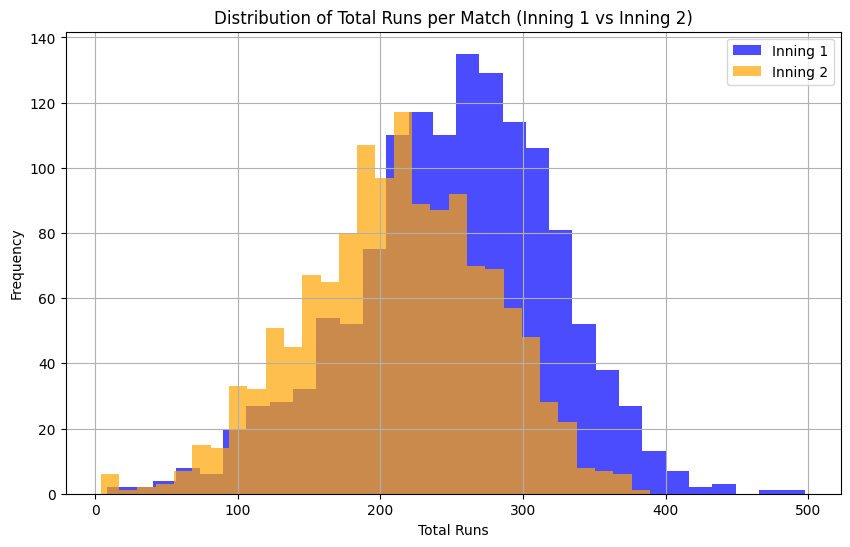

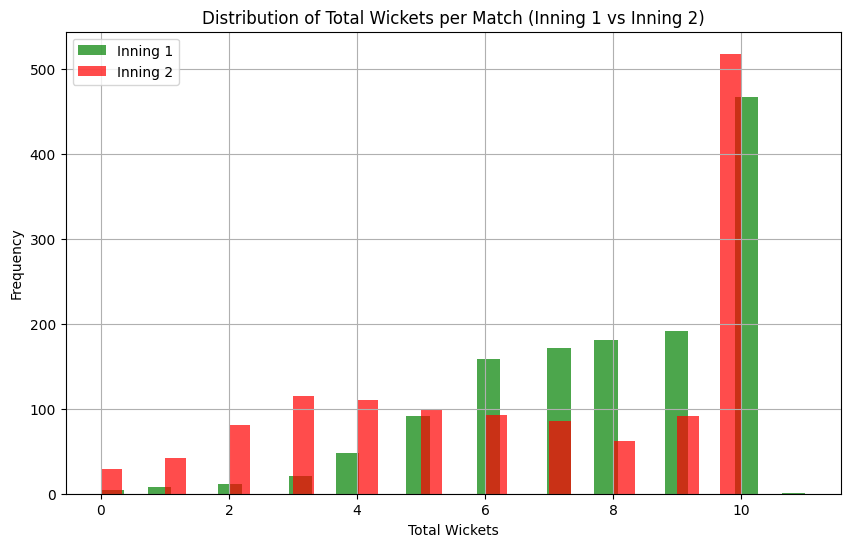

Inning 1 Stats:
         TotalRuns  TotalWickets
count  1356.000000   1356.000000
mean    251.407080      7.931416
std      70.775677      2.116640
min       8.000000      0.000000
25%     208.000000      6.000000
50%     256.000000      8.000000
75%     300.000000     10.000000
max     498.000000     11.000000

Inning 2 Stats:
         TotalRuns  TotalWickets
count  1326.000000   1326.000000
mean    211.865008      6.895173
std      65.244879      3.174239
min       4.000000      0.000000
25%     168.000000      4.000000
50%     213.000000      8.000000
75%     258.000000     10.000000
max     389.000000     10.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'innings' DataFrame is already loaded and properly formatted

# Calculate total runs and wickets per innings
inning1 = innings[innings['inningsNumber'] == 1]
inning2 = innings[innings['inningsNumber'] == 2]

# Grouping by matchId for total runs and wickets for each innings
inning1_stats = inning1.groupby('matchId').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).rename(columns={'runs': 'TotalRuns', 'wkts': 'TotalWickets'}).reset_index()

inning2_stats = inning2.groupby('matchId').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).rename(columns={'runs': 'TotalRuns', 'wkts': 'TotalWickets'}).reset_index()

# Plotting the distribution of runs for both innings
plt.figure(figsize=(10, 6))
plt.hist(inning1_stats['TotalRuns'], bins=30, color='blue', alpha=0.7, label='Inning 1')
plt.hist(inning2_stats['TotalRuns'], bins=30, color='orange', alpha=0.7, label='Inning 2')
plt.title('Distribution of Total Runs per Match (Inning 1 vs Inning 2)')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the distribution of wickets for both innings
plt.figure(figsize=(10, 6))
plt.hist(inning1_stats['TotalWickets'], bins=30, color='green', alpha=0.7, label='Inning 1')
plt.hist(inning2_stats['TotalWickets'], bins=30, color='red', alpha=0.7, label='Inning 2')
plt.title('Distribution of Total Wickets per Match (Inning 1 vs Inning 2)')
plt.xlabel('Total Wickets')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics
print("Inning 1 Stats:")
print(inning1_stats[['TotalRuns', 'TotalWickets']].describe())
print("\nInning 2 Stats:")
print(inning2_stats[['TotalRuns', 'TotalWickets']].describe())


# **Toss Impact**

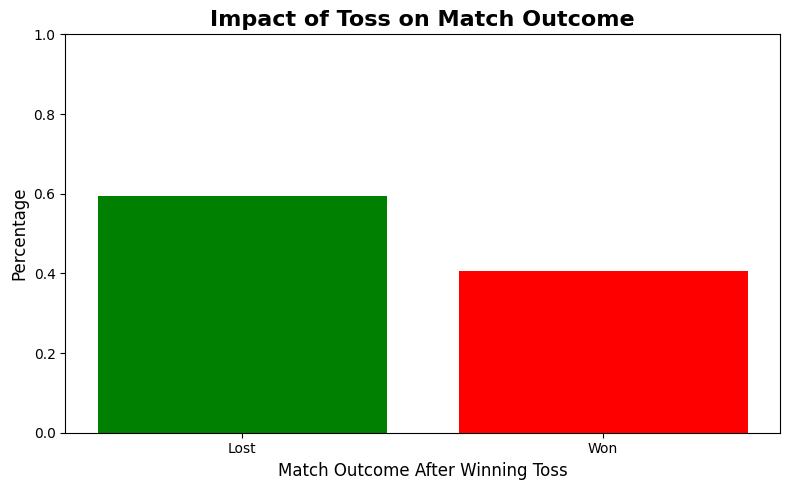

Percentage that won the match after winning the toss: 40.598703124672106 %
Percentage that lost the match after winning the toss: 59.401296875327894 %


In [ ]:
import matplotlib.pyplot as plt

# Ensure the 'toss_match_winner' column exists and is properly populatedxA
if 'toss_match_winner' in matches_enhanced.columns:
    # Calculate the proportion of matches won after winning the toss
    toss_impact = matches_enhanced['toss_match_winner'].value_counts(normalize=True)

    # Plotting the results
    plt.figure(figsize=(8, 5))
    plt.bar(
        ['Lost', 'Won'],
        [toss_impact.get(False, 0), toss_impact.get(True, 0)],
        color=['green', 'red']
    )
    plt.title('Impact of Toss on Match Outcome', fontsize=16, fontweight='bold')
    plt.xlabel('Match Outcome After Winning Toss', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.ylim(0, 1)  # Ensure y-axis is scaled from 0 to 1
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Print the percentages for verification
    print("Percentage that won the match after winning the toss:", toss_impact.get(True, 0) * 100, "%")
    print("Percentage that lost the match after winning the toss:", toss_impact.get(False, 0) * 100, "%")
else:
    print("Error: 'toss_match_winner' column not found in the DataFrame.")


#**Team Performance Overview**

<ipython-input-18-22ee969b1a97>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


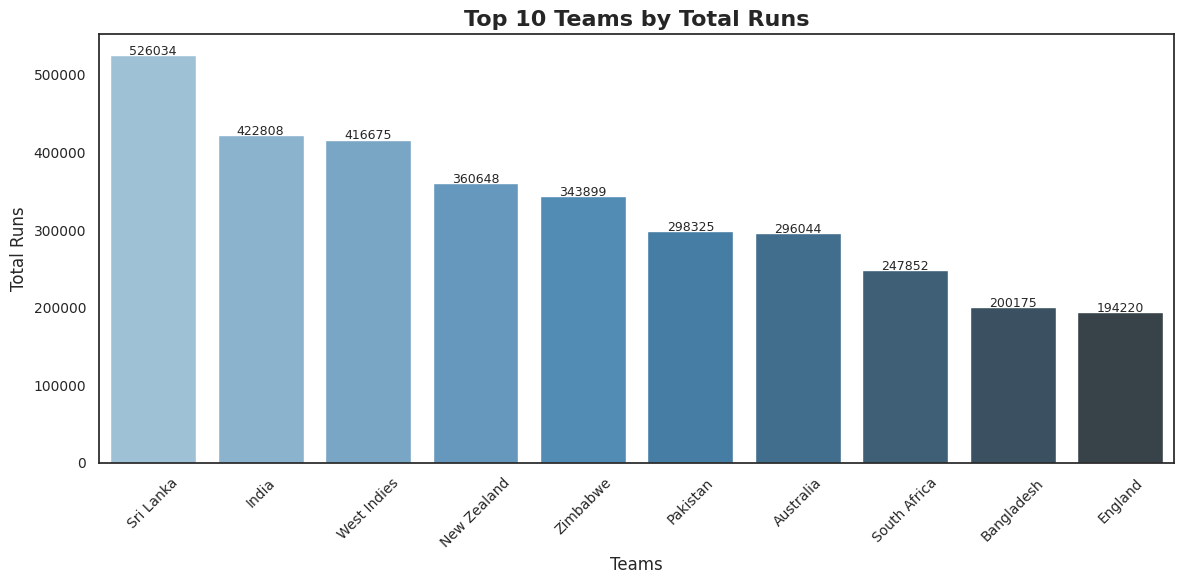

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="white")

# Sort the data in descending order
sorted_total_runs = team_performance.sort_values(by='TotalRuns', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_total_runs['TeamName'],
    y=sorted_total_runs['TotalRuns'],
    palette="Blues_d"
)
plt.title('Top 10 Teams by Total Runs', fontsize=16, fontweight='bold')
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add data labels
for i, v in enumerate(sorted_total_runs['TotalRuns']):
    plt.text(i, v + 200, str(int(v)), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-16-9ff36fe0bffb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


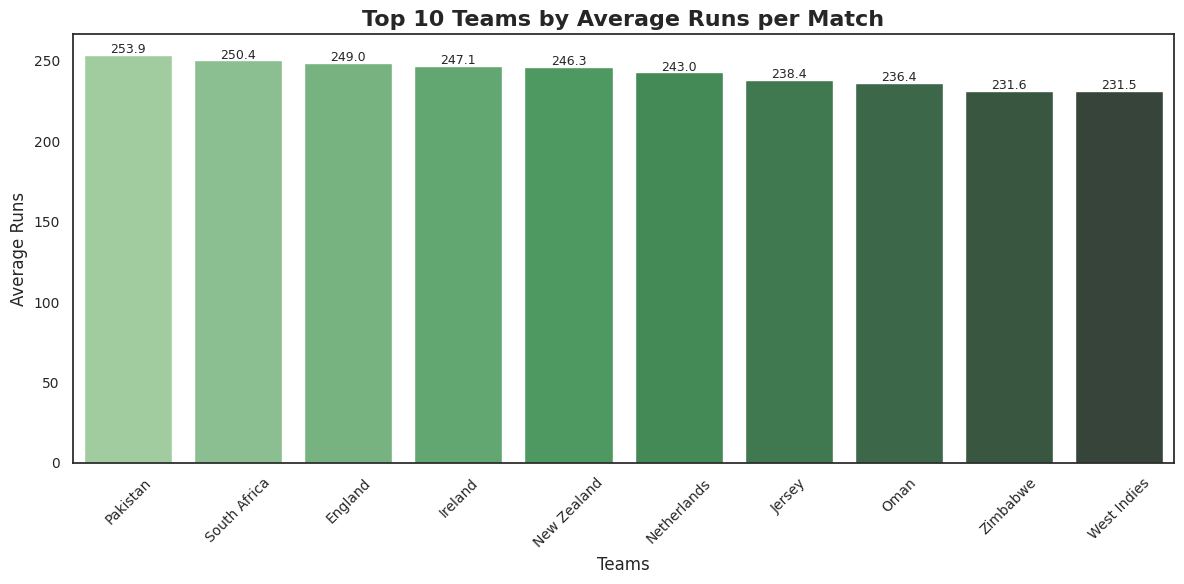

In [ ]:
# Sort the data in descending order
sorted_avg_runs = team_performance.sort_values(by='AverageRuns', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_avg_runs['TeamName'],
    y=sorted_avg_runs['AverageRuns'],
    palette="Greens_d"
)
plt.title('Top 10 Teams by Average Runs per Match', fontsize=16, fontweight='bold')
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Average Runs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add data labels
for i, v in enumerate(sorted_avg_runs['AverageRuns']):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


<ipython-input-17-d6d037195f24>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


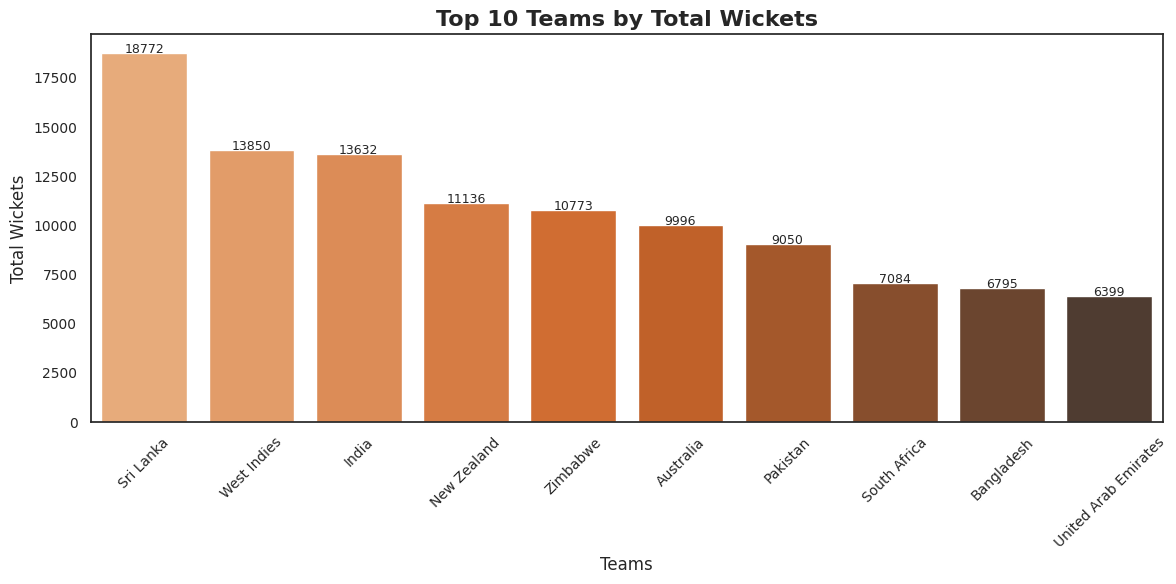

In [ ]:
# Sort the data in descending order
sorted_total_wickets = team_performance.sort_values(by='TotalWickets', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_total_wickets['TeamName'],
    y=sorted_total_wickets['TotalWickets'],
    palette="Oranges_d"
)
plt.title('Top 10 Teams by Total Wickets', fontsize=16, fontweight='bold')
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Total Wickets', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add data labels
for i, v in enumerate(sorted_total_wickets['TotalWickets']):
    plt.text(i, v + 5, str(int(v)), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# **Venue Analysis**

In [ ]:
# Verify the venues DataFrame
print(venues.head())  # Check if the venues DataFrame exists and is populated

# Load venues into the SQLite database
venues.to_sql('venues', conn, index=False, if_exists='replace')  # Load into SQLite


   id                   fullName       city country
0   1  M. A. Chidambaram Stadium    Chennai   India
1   2               Eden Gardens    Kolkata   India
2   3     Sawai Mansingh Stadium     Jaipur   India
3   4           Wankhede Stadium     Mumbai   India
4   5     M. Chinnaswamy Stadium  Bengaluru   India


193

In [ ]:
# Corrected SQL query to aggregate venue performance
query = """
SELECT
    v.fullName AS VenueName,
    v.city AS City,
    v.country AS Country,
    SUM(i.runs) AS TotalRuns,
    AVG(i.runs) AS AverageRuns,
    SUM(i.wkts) AS TotalWickets,
    COUNT(DISTINCT i.matchId) AS MatchesPlayed
FROM innings i
JOIN matches m ON i.matchId = m.id
JOIN venues v ON m.venueId = v.id
GROUP BY v.id
ORDER BY TotalRuns DESC
"""

# Execute the query
venue_performance = pd.read_sql_query(query, conn)

# Display the results
print(venue_performance.head())


                                VenueName      City     Country  TotalRuns  \
0  Sher-e-Bangla National Cricket Stadium    Mirpur  Bangladesh      23950   
1                      Harare Sports Club    Harare    Zimbabwe      22396   
2                      Queens Sports Club  Bulawayo    Zimbabwe      15742   
3                     R Premadasa Stadium   Colombo   Sri Lanka      15489   
4             Dubai International Stadium     Dubai         UAE      15481   

   AverageRuns  TotalWickets  MatchesPlayed  
0   211.946903           888             57  
1   211.283019           789             53  
2   215.643836           546             37  
3   231.179104           497             34  
4   203.697368           572             38  


<ipython-input-26-9622a8d89c5d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-26-9622a8d89c5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


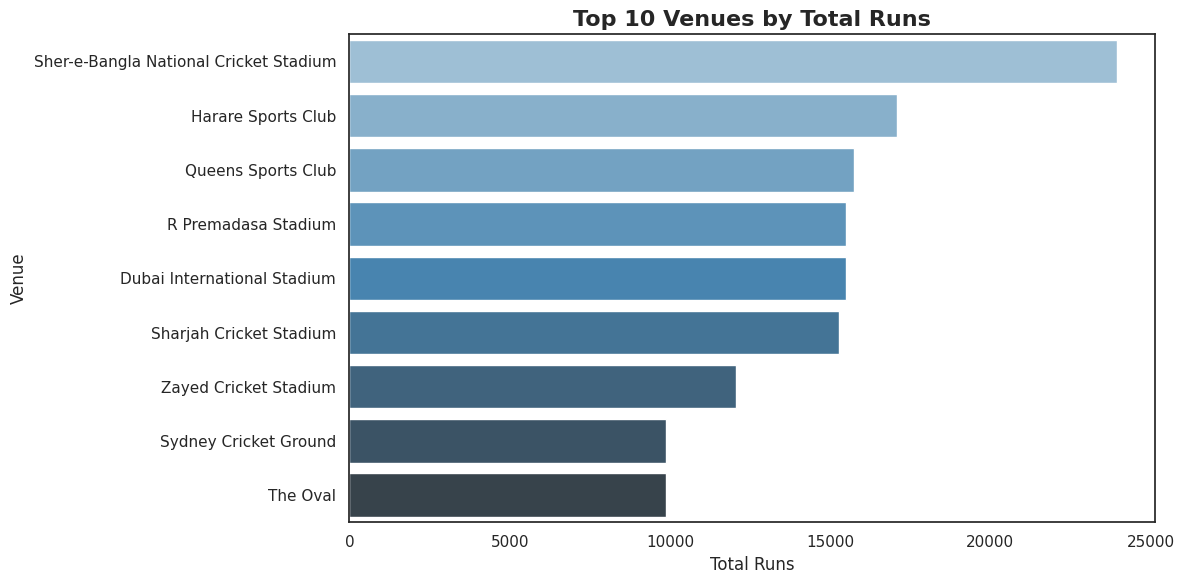

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by Total Runs
sorted_venues_runs = venue_performance.sort_values(by='TotalRuns', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    y=sorted_venues_runs['VenueName'],
    x=sorted_venues_runs['TotalRuns'],
    palette="Blues_d",
    ci=None  # Removes the black error line
)

# Aesthetic adjustments
plt.title('Top 10 Venues by Total Runs', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.tight_layout()
plt.show()


# **Player Performance Analysis**

In [ ]:
import pandas as pd
import sqlite3

# Load data into SQLite
conn = sqlite3.connect(':memory:')  # In-memory database
over_bd.to_sql('over_bd', conn, index=False, if_exists='replace')
players.to_sql('players', conn, index=False, if_exists='replace')

# SQL Query to calculate player performance metrics
query = """
SELECT
    p.fullName AS PlayerName,
    p.nationality AS Nationality,
    SUM(o.run_one) AS Singles,
    SUM(o.run_two) AS Doubles,
    SUM(o.run_three) AS Triples,
    SUM(o.run_four) AS Fours,
    SUM(o.run_six) AS Sixes,
    SUM(o.run_total) AS TotalRuns
FROM over_bd o
JOIN players p ON o.facingBatsmanId = p.id
GROUP BY p.id
ORDER BY TotalRuns DESC
"""

# Execute the query
player_performance = pd.read_sql_query(query, conn)

# Display the results
print(player_performance.head())


     PlayerName  Nationality  Singles  Doubles  Triples  Fours  Sixes  \
0   Virat Kohli       Indian    57420     8874      348  13920   2784   
1   Jos Buttler          ENG    42900     7579      858   8580   4719   
2  Rohit Sharma       Indian    21584     3408      426  12922   5964   
3    Babar Azam           PK    47964     8316      840  10584   1260   
4     Shai Hope  West Indian    43180     5950      935   9775   2550   

   TotalRuns  
0     152772  
1     128271  
2     122262  
3     120036  
4     117300  


<ipython-input-28-e8d5ac44bef8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


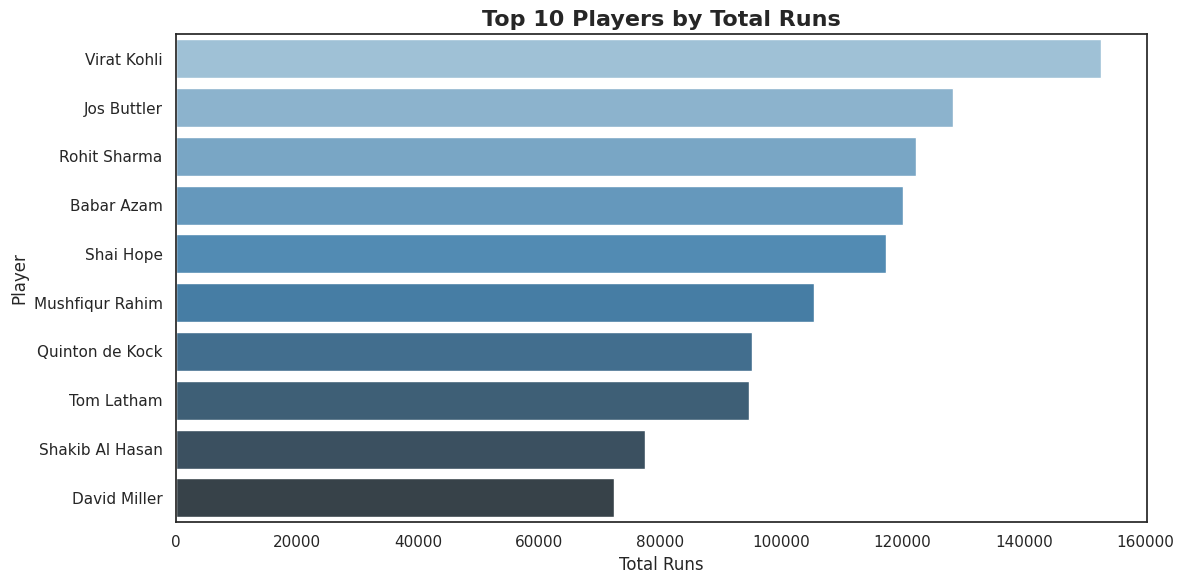

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort players by Total Runs
top_players = player_performance.sort_values(by='TotalRuns', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_players['PlayerName'],
    x=top_players['TotalRuns'],
    palette="Blues_d"
)
plt.title('Top 10 Players by Total Runs', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-29-e854e8b6a510>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


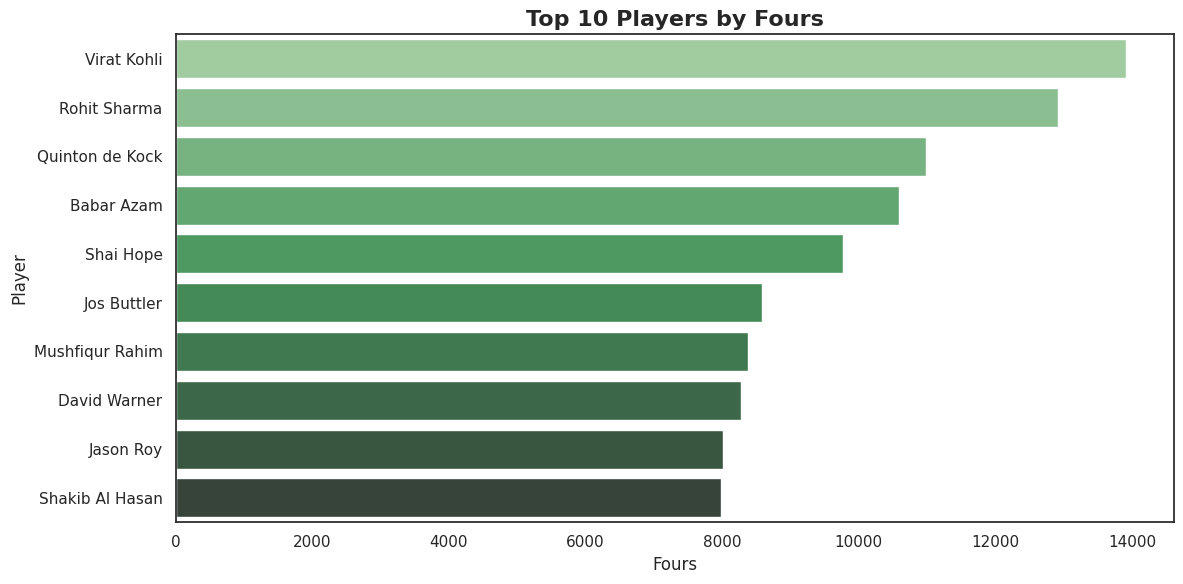

In [ ]:
# Sort players by Fours
top_fours = player_performance.sort_values(by='Fours', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_fours['PlayerName'],
    x=top_fours['Fours'],
    palette="Greens_d"
)
plt.title('Top 10 Players by Fours', fontsize=16, fontweight='bold')
plt.xlabel('Fours', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-30-00842981b31e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


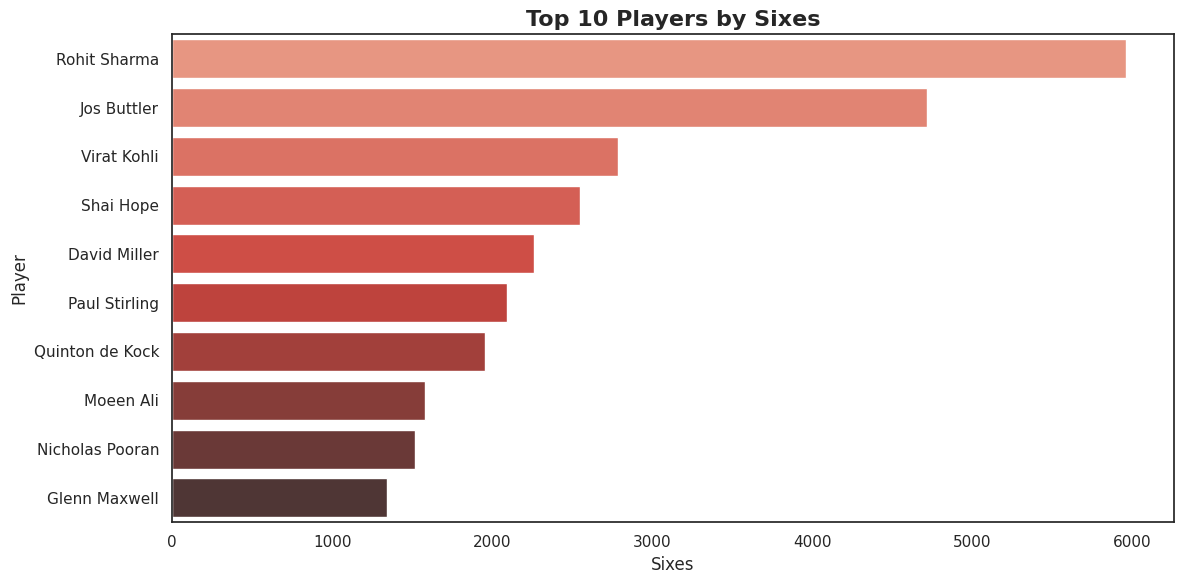

In [ ]:
# Sort players by Sixes
top_sixes = player_performance.sort_values(by='Sixes', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_sixes['PlayerName'],
    x=top_sixes['Sixes'],
    palette="Reds_d"
)
plt.title('Top 10 Players by Sixes', fontsize=16, fontweight='bold')
plt.xlabel('Sixes', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# SQL Query to calculate bowler performance metrics
query = """
SELECT
    p.fullName AS BowlerName,
    p.nationality AS Nationality,
    SUM(o.wicket) AS TotalWickets,
    SUM(o.run_wide) AS Wides,
    SUM(o.run_noball) AS NoBalls
FROM over_bd o
JOIN players p ON o.bowlerId = p.id
GROUP BY p.id
ORDER BY TotalWickets DESC
"""

# Execute the query
bowler_performance = pd.read_sql_query(query, conn)

# Display the results
print(bowler_performance.head())



        BowlerName  Nationality  TotalWickets  Wides  NoBalls
0   Mitchell Starc   Australian          5073   2848        0
1  Shakib Al Hasan           BD          4515   1260        0
2     Jason Holder  West Indian          4514   1830      610
3   Alzarri Joseph  West Indian          4446   2613      195
4      Adil Rashid          ENG          4428   1512      108


<ipython-input-35-5bec9691dd79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


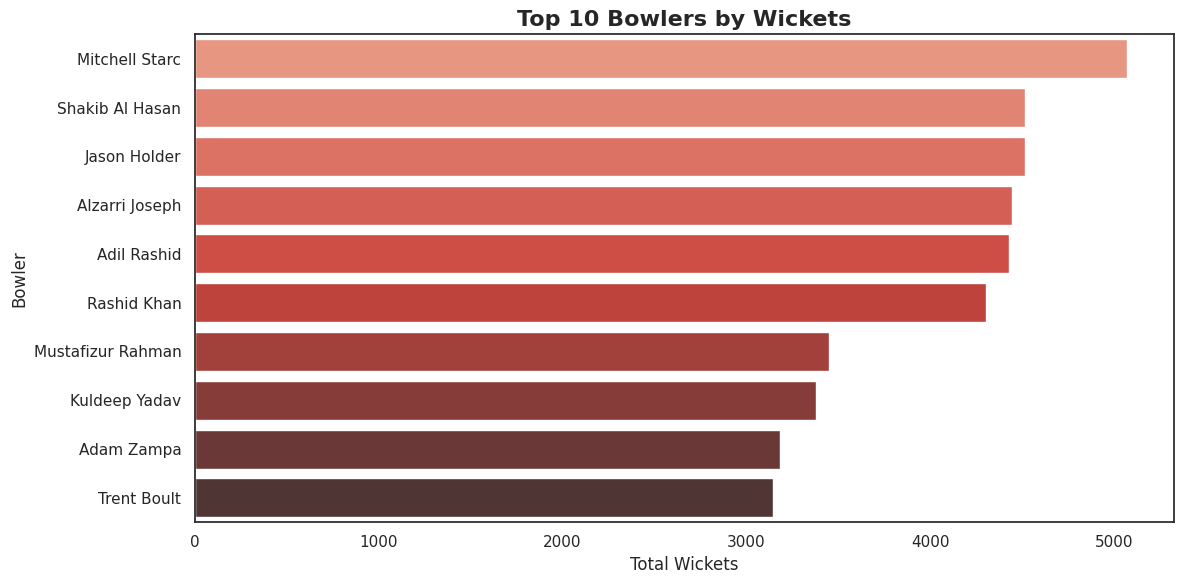

In [ ]:
# Sort bowlers by Total Wickets
top_bowlers = bowler_performance.sort_values(by='TotalWickets', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_bowlers['BowlerName'],
    x=top_bowlers['TotalWickets'],
    palette="Reds_d"
)
plt.title('Top 10 Bowlers by Wickets', fontsize=16, fontweight='bold')
plt.xlabel('Total Wickets', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# SQL Query to calculate extras (wides + no-balls) for bowlers
query = """
SELECT
    p.fullName AS BowlerName,
    p.nationality AS Nationality,
    SUM(o.run_wide + o.run_noball) AS Extras
FROM over_bd o
JOIN players p ON o.bowlerId = p.id
GROUP BY p.id
ORDER BY Extras DESC
"""

# Execute the query
bowler_performance_extras = pd.read_sql_query(query, conn)

# Display the results
print(bowler_performance_extras.head())


          BowlerName  Nationality  Extras
0     Mitchell Starc   Australian    2848
1     Alzarri Joseph  West Indian    2808
2  Mustafizur Rahman           BD    2484
3       Jason Holder  West Indian    2440
4        Rashid Khan       Afghan    1752


<ipython-input-43-5dba52d1ec07>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


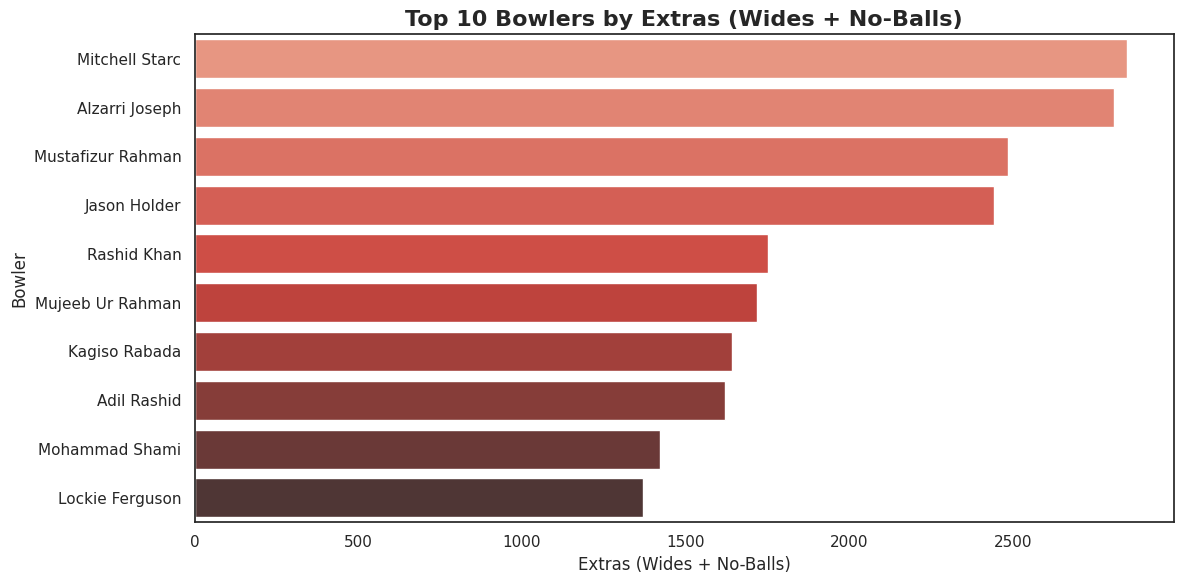

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort bowlers by Extras
top_extras_bowlers = bowler_performance_extras.sort_values(by='Extras', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_extras_bowlers['BowlerName'],
    x=top_extras_bowlers['Extras'],
    palette="Reds_d"
)

# Add title and labels
plt.title('Top 10 Bowlers by Extras (Wides + No-Balls)', fontsize=16, fontweight='bold')
plt.xlabel('Extras (Wides + No-Balls)', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Load over_hist into the SQLite database
over_hist.to_sql('over_hist', conn, index=False, if_exists='replace')



25746

In [ ]:
# Load all required tables into the SQLite database
over_bd.to_sql('over_bd', conn, index=False, if_exists='replace')
innings.to_sql('innings', conn, index=False, if_exists='replace')
matches.to_sql('matches', conn, index=False, if_exists='replace')
players.to_sql('players', conn, index=False, if_exists='replace')
teams.to_sql('teams', conn, index=False, if_exists='replace')
venues.to_sql('venues', conn, index=False, if_exists='replace')


193

In [ ]:
query_batsman = """
WITH TotalRuns AS (
    SELECT
        o.facingBatsmanId AS BatsmanId,
        SUM(o.run_total) AS TotalRuns
    FROM over_bd o
    GROUP BY o.facingBatsmanId
),
MatchesPlayed AS (
    SELECT
        o.facingBatsmanId AS BatsmanId,
        COUNT(DISTINCT m.id) AS MatchesPlayed
    FROM over_bd o
    JOIN over_hist h ON o.overHistoryId = h.id
    JOIN innings i ON h.inningId = i.id
    JOIN matches m ON i.matchId = m.id
    GROUP BY o.facingBatsmanId
)
SELECT
    p.fullName AS BatsmanName,
    mp.MatchesPlayed,
    tr.TotalRuns,
    CAST(tr.TotalRuns AS FLOAT) / mp.MatchesPlayed AS AverageRuns
FROM MatchesPlayed mp
JOIN TotalRuns tr ON mp.BatsmanId = tr.BatsmanId
JOIN players p ON p.id = mp.BatsmanId
WHERE mp.MatchesPlayed > 18
GROUP BY p.id, p.fullName, mp.MatchesPlayed, tr.TotalRuns
ORDER BY AverageRuns DESC
LIMIT 10
"""


In [ ]:
# Execute the corrected query
top_batsmen = pd.read_sql_query(query_batsman, conn)

# Display the results
print("Top 10 Batsmen by Average Runs:")
print(top_batsmen)


Top 10 Batsmen by Average Runs:
       BatsmanName  MatchesPlayed  TotalRuns  AverageRuns
0       Babar Azam             23       1429    62.130435
1     Shubman Gill             28       1606    57.357143
2     Harry Tector             19       1033    54.368421
3      Imam-ul-Haq             19        983    51.736842
4     Shreyas Iyer             19        870    45.789474
5  Pathum Nissanka             29       1326    45.724138
6  Gerhard Erasmus             30       1349    44.966667
7     Fakhar Zaman             23        958    41.652174
8  Quinton de Kock             19        780    41.052632
9     Rohit Sharma             21        861    41.000000


<ipython-input-90-653ff88c3cb7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


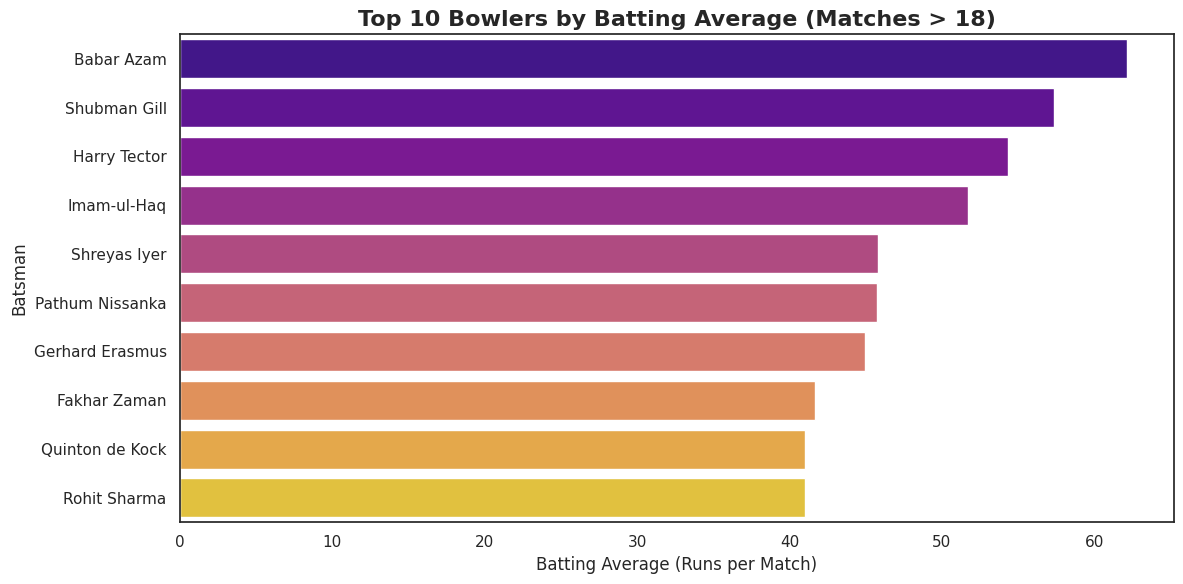

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_batsmen['BatsmanName'],
    x=top_batsmen['AverageRuns'],
    palette="plasma"
)
plt.title('Top 10 Bowlers by Batting Average (Matches > 18)', fontsize=16, fontweight='bold')
plt.xlabel('Batting Average (Runs per Match)', fontsize=12)
plt.ylabel('Batsman', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
query_bowler_matches_gt_15 = """
WITH TotalRunsConceded AS (
    SELECT
        o.bowlerId AS BowlerId,
        SUM(o.run_total) AS TotalRunsConceded
    FROM over_bd o
    JOIN over_hist h ON o.overHistoryId = h.id
    JOIN innings i ON h.inningId = i.id
    JOIN matches m ON i.matchId = m.id
    WHERE m.Year > 2000  -- Filter for matches after the year 2000
    GROUP BY o.bowlerId
),
TotalWickets AS (
    SELECT
        o.bowlerId AS BowlerId,
        SUM(o.wicket) AS TotalWickets
    FROM over_bd o
    JOIN over_hist h ON o.overHistoryId = h.id
    JOIN innings i ON h.inningId = i.id
    JOIN matches m ON i.matchId = m.id
    WHERE m.Year > 2000  -- Filter for matches after the year 2000
    GROUP BY o.bowlerId
),
MatchesPlayed AS (
    SELECT
        o.bowlerId AS BowlerId,
        COUNT(DISTINCT m.id) AS MatchesPlayed
    FROM over_bd o
    JOIN over_hist h ON o.overHistoryId = h.id
    JOIN innings i ON h.inningId = i.id
    JOIN matches m ON i.matchId = m.id
    WHERE m.Year > 2000  -- Filter for matches after the year 2000
    GROUP BY o.bowlerId
)
SELECT
    p.fullName AS BowlerName,
    mp.MatchesPlayed,
    tw.TotalWickets,
    tr.TotalRunsConceded,
    CASE
        WHEN tw.TotalWickets > 0 THEN CAST(tr.TotalRunsConceded AS FLOAT) / tw.TotalWickets
        ELSE NULL
    END AS BowlingAverage
FROM TotalRunsConceded tr
JOIN TotalWickets tw ON tr.BowlerId = tw.BowlerId
JOIN MatchesPlayed mp ON tr.BowlerId = mp.BowlerId
JOIN players p ON p.id = tr.BowlerId
WHERE tw.TotalWickets > 0  -- Only include bowlers with at least one wicket
  AND mp.MatchesPlayed > 25  -- Filter bowlers with more than 15 matches
GROUP BY p.id, p.fullName, mp.MatchesPlayed, tw.TotalWickets, tr.TotalRunsConceded
ORDER BY BowlingAverage ASC
LIMIT 10
"""


In [ ]:
# Execute the updated query
top_bowlers_matches_gt_15 = pd.read_sql_query(query_bowler_matches_gt_15, conn)

# Display the results
print("Top 10 Bowlers by Bowling Average (Matches > 15, After 2000):")
print(top_bowlers_matches_gt_15)


Top 10 Bowlers by Bowling Average (Matches > 15, After 2000):
          BowlerName  MatchesPlayed  TotalWickets  TotalRunsConceded  \
0  Ruben Trumpelmann             33           136               1303   
1     Mohammed Siraj             26            93                924   
2     Alzarri Joseph             26           114               1187   
3           Karan KC             30            99               1183   
4         Bilal Khan             25           102               1220   
5     Shardul Thakur             25            74                911   
6   Mujeeb Ur Rahman             23            63                852   
7       Norman Vanua             25            60                842   
8          Mark Watt             27            69                972   
9  Mustafizur Rahman             21            50                721   

   BowlingAverage  
0        9.580882  
1        9.935484  
2       10.412281  
3       11.949495  
4       11.960784  
5       12.310811  
6    

<ipython-input-85-e07764a4620a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


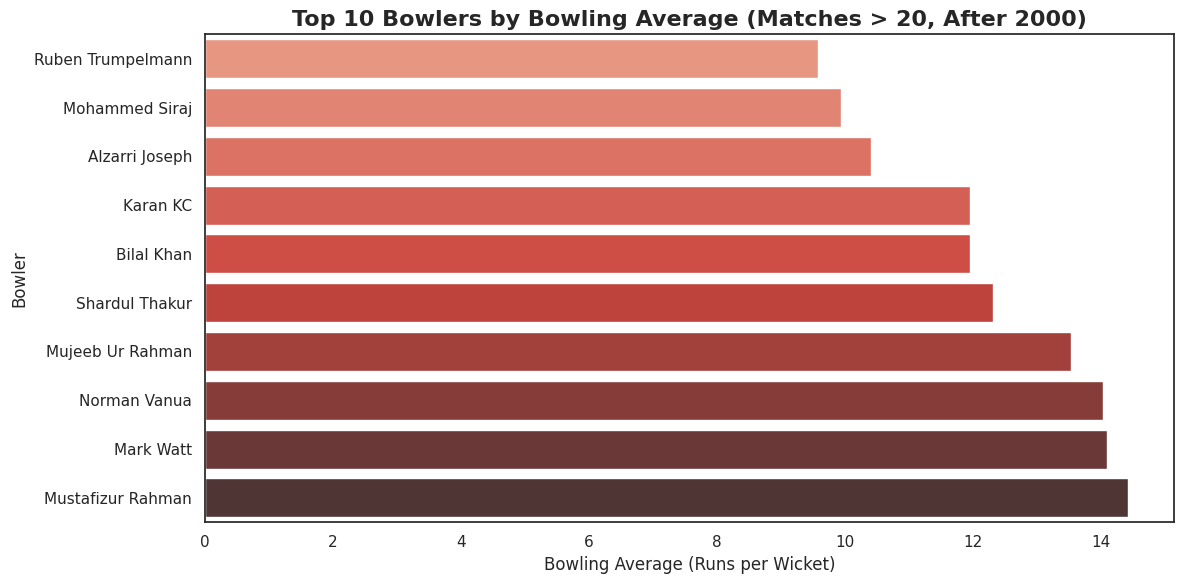

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_bowlers_matches_gt_15['BowlerName'],
    x=top_bowlers_matches_gt_15['BowlingAverage'],
    palette="Reds_d"
)
plt.title('Top 10 Bowlers by Bowling Average (Matches > 20, After 2000)', fontsize=16, fontweight='bold')
plt.xlabel('Bowling Average (Runs per Wicket)', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.tight_layout()
plt.show()


# **Chasing or Defending?**

In [ ]:
query_chasing_vs_defending = """
SELECT
    CASE
        WHEN m."toss.elected" = 'field' THEN 'Chasing'
        WHEN m."toss.elected" = 'bat' THEN 'Defending'
        ELSE 'Unknown'
    END AS Strategy,
    COUNT(m.id) AS MatchesPlayed,
    COUNT(CASE WHEN m.matchWinner = m."toss.winner" THEN 1 END) AS MatchesWon,
    CAST(COUNT(CASE WHEN m.matchWinner = m."toss.winner" THEN 1 END) AS FLOAT) / COUNT(m.id) * 100 AS WinRate
FROM matches m
GROUP BY Strategy
ORDER BY WinRate DESC
"""


In [ ]:
# Correct match_winner logic
def determine_match_winner(row):
    if row['matchStatus_victoryMarginRuns'] > 0:
        return row['toss.winner']  # The team that chose to bat won
    elif row['matchStatus_victoryMarginRuns'] == 0 and row['matchStatus_victoryMarginWickets'] > 0:
        return row['toss.winner']  # The team that chose to field won
    else:
        return None  # Handle cases with missing or invalid data

matches_enhanced['match_winner'] = matches_enhanced.apply(determine_match_winner, axis=1)


In [ ]:
# Determine if the toss winner also won the match
matches_enhanced['toss_match_winner'] = matches_enhanced['toss.winner'] == matches_enhanced['match_winner']


In [ ]:
# Check the distribution of toss_match_winner by toss_decision
print(matches_enhanced.groupby('toss_decision')['toss_match_winner'].value_counts())


toss_decision  toss_match_winner
Bat            True                 34280
               False                 2802
Field          True                 51671
               False                 2661
Name: count, dtype: int64


In [ ]:
# Group data by toss decision and calculate win rates
toss_analysis = matches_enhanced.groupby('toss_decision')['toss_match_winner'].mean().reset_index()
toss_analysis.columns = ['Toss Decision', 'Win Rate']

# Print the results for verification
print(toss_analysis)


  Toss Decision  Win Rate
0           Bat  0.924438
1         Field  0.951023


<ipython-input-115-1f6c588076ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Toss Decision', y='Win Rate', data=toss_analysis, palette="coolwarm")


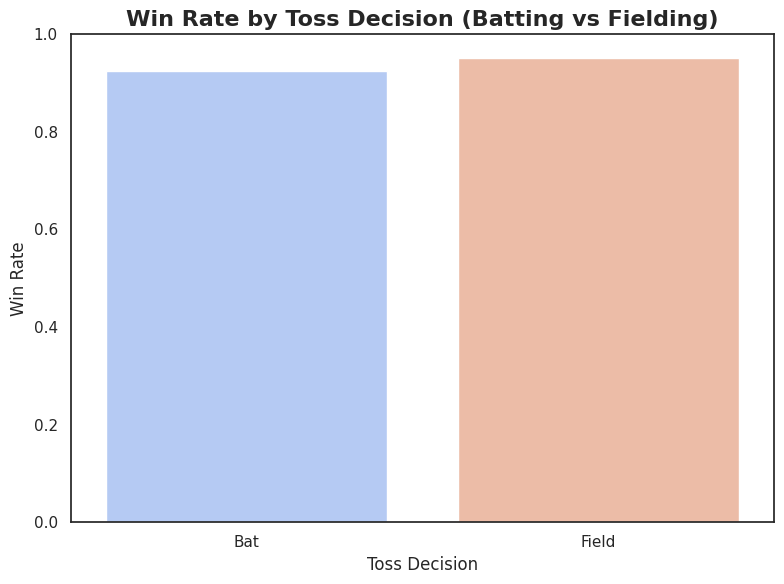

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Toss Decision', y='Win Rate', data=toss_analysis, palette="coolwarm")
plt.title('Win Rate by Toss Decision (Batting vs Fielding)', fontsize=16, fontweight='bold')
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.ylim(0, 1)  # Scale the y-axis to percentages
plt.tight_layout()
plt.show()
